## Hydrology 


### Contribution to discharge

- discharge (obs vs sim)
- base flow 
- lateral flow 
- runoff
- drainage

In [5]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [6]:
PC = False
version = "v10"
folder = "1"

In [7]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


### Observed

In [56]:
# Q (m3)
q_obs = getWaterData(tss=True)
q_obs.loc[q_obs.Qm3 < 0,'Qm3'] = np.nan

# Q sim
col = "sim"
name_tss = "n_accVol_m3"
filename = "resN_" + name_tss + ".tss"

q_sim_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

# Components
# Baseflow (m3)
name_tss = "accBaseflow_m3"
filename = "resW_" + name_tss + ".tss"

bf_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

# Outlet latflow (m3)
name_tss = "o_cellLatflow_m3"
filename = "resW_" + name_tss + ".tss"

lf_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

# Runoff (m3)
name_tss = "accRunoff_m3"
filename = "resW_" + name_tss + ".tss"

ro_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

# Drainage (m3)
name_tss = "o_accDrain_m3"
filename = "resW_" + name_tss + ".tss"

dr_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

In [45]:
# Julian days
s = 180
e = 290

In [57]:
dates = getTime(sep=";")
x = dates.Date.tolist()[s:e]
qObs = q_obs.Qm3.tolist()[s:e]
qSim = q_sim_m3.sim.tolist()[s:e]
bf = bf_m3.sim.tolist()[s:e]
lf = lf_m3.sim.tolist()[s:e]
ro = ro_m3.sim.tolist()[s:e]
dr = dr_m3.sim.tolist()[s:e]

In [75]:
traceObs = go.Scatter(
    x = x,
    y = qObs,
    mode = 'lines',
    name = 'Q (m3/d)',
    marker=dict(
        color= 'green')
)

traceSim = go.Scatter(
    x = x,
    y = qSim,
    mode = 'lines',
    name = 'Q Sim.',
    marker=dict(
        color= 'blue')
)

traceBF = go.Scatter(
    x = x,
    y = bf,
    mode = 'lines',
    name = 'Baseflow Sim.',
    line = dict(
        color = '#FFBAD2',
        width = 3,
        dash = 'dot')
)

traceLF = go.Scatter(
    x = x,
    y = lf,
    mode = 'lines',
    name = 'Latflow Sim.',
    line = dict(
        color = 'purple',
        width = 3,
        dash = 'dot')
)

traceRO = go.Scatter(
    x = x,
    y = ro,
    mode = 'lines',
    name = 'Runoff Sim.',
    line = dict(
        color = 'rgb(178,223,138)',
        width = 3,
        dash = 'dot')
)

traceDR = go.Scatter(
    x = x,
    y = dr,
    mode = 'lines',
    name = 'Drainage Sim.',
    line = dict(
        color = '#F44336',
        width = 3,
        dash = 'dot')
)

layout = go.Layout(
    title='Discharge Components',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=r'$Q (m^3/d)$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [99]:
data = [traceObs, traceSim, traceBF, traceLF, traceRO, traceDR]
figname = "Qcomponents.png"

%matplotlib inline
import plotlycred

online = True
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data, layout=layout)
    py.image.save_as(fig, filename=figname)
    # py.plot(fig, filename=figname) # Opens in web
else:
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


### Q Components $(m^3/d)$

Follow this link to interact with the data:

https://plot.ly/~DayTimeChunks/15/


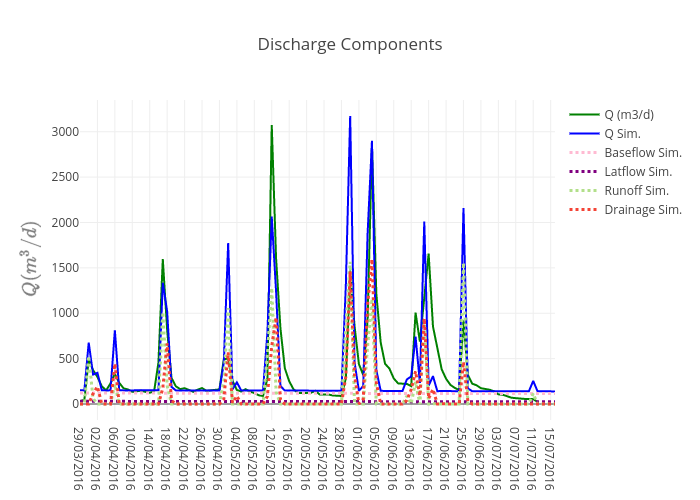

In [100]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)